# Logistic Regression-take Iris data as an example

## Read the Data

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


def iris_types(s):
    s = s.decode('UTF-8')  # we need to convert byte value to string value
    it = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
    return it[s]


path = 'Iris.txt'
data = np.loadtxt(path, delimiter=',', converters={4: iris_types})
print(data[0:4, :])
x, y = np.split(data, (4,), axis=1)
# for the visualising purpose, we only take the first 2 columns
x = x[:, :2]
print('this is x:\n', x[:4, :])
print('this is y:\n', y[:4, :])

[[ 5.1  3.5  1.4  0.2  0. ]
 [ 4.9  3.   1.4  0.2  0. ]
 [ 4.7  3.2  1.3  0.2  0. ]
 [ 4.6  3.1  1.5  0.2  0. ]]
this is x:
 [[ 5.1  3.5]
 [ 4.9  3. ]
 [ 4.7  3.2]
 [ 4.6  3.1]]
this is y:
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


## train the model and assign test set

In [19]:
logreg = LogisticRegression()
logreg = logreg.fit(x, y.ravel())
N, M = 500, 500  # sample number of rows and columns
x1_min, x1_max = x[:, 0].min(), x[:, 0].max()  # range for the column 0
x2_min, x2_max = x[:, 1].min(), x[:, 1].max()  # range for the column 1
t1 = np.linspace(x1_min, x1_max, N)  # evenly spaced number. start from min,end with max, total number N
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2) 
x_test = np.stack((x1.flat, x2.flat), axis=1) # cartesian product of every possible points

## plot the predict the value

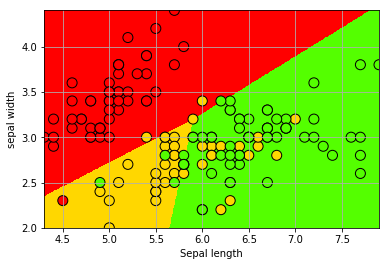

In [20]:
y_hat = logreg.predict(x_test)  # predicted value for plot
y_hat = y_hat.reshape(x1.shape)
plt.pcolormesh(x1, x2, y_hat, cmap=plt.cm.prism)
plt.scatter(x[:, 0], x[:, 1], c=y.reshape(-1), edgecolors='k', cmap=plt.cm.prism, s=100)

# sample display
plt.xlabel('Sepal length')
plt.ylabel('sepal width')
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid()
plt.show()


## Predict the samples and calculate the accuracy

In [21]:
y_hat = logreg.predict(x) #predict value
y = y.reshape(-1) #reshape the y value to a single row matrix
result = y_hat == y # define the result matrix as the comparing result between y_hat and y
print(y_hat)
print(y)
print(result)
c = np.count_nonzero(result) # every true value is over 0, so they will be counted
print(c)
print('Accuracy: %.2f%%' % (100 * float(c) / float(len(result))))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  2.  2.  2.  1.
  2.  1.  2.  1.  2.  1.  1.  2.  2.  2.  1.  2.  1.  2.  2.  1.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  1.  1.  1.  2.  2.  0.  0.  2.  2.  1.  1.
  1.  2.  2.  1.  1.  1.  1.  2.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.
  2.  2.  2.  2.  2.  1.  1.  2.  2.  2.  2.  2.  2.  1.  2.  2.  2.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  2.  2.  0.  2.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1. 

Analysis time:
 we only use 2 parameters for visualization. The classification accuracy is only 76%. Not too bad. 
 But it is also not appealing any way.
 I will use all 4 parameters and to see how far these data can go.

## New prediction with 4 parameters

In [22]:
x, y = np.split(data, (4,), axis=1)
logreg = LogisticRegression()
logreg = logreg.fit(x, y.ravel())
y_hat = logreg.predict(x)
y = y.reshape(-1)
result = y == y_hat
print(result)
c = np.count_nonzero(result)
print(c)
print('New Accuracy with 4 parameters: %.2f%%' % (100 * float(c) / float(len(result))))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
144
New Accuracy with 4 parameters: 96.00%


Analysis time: 
with 4 parameters, the accuracy is over 95%, which looks good.